# Import libraries

In [16]:
# A module for virtualization
import matplotlib.pyplot as plt
import seaborn as sns

# A module for handling data
import pandas as pd
# A module for rescale the data
from sklearn.preprocessing import MinMaxScaler 

# A method used to split the dataset into training and testing
from sklearn.model_selection import train_test_split

# A module for convert categorical data to numerical
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder 

# SVM model
from sklearn import svm, datasets

# The Python package for scientific computing
import numpy as np

#metrics for reports and vertualization
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report 

# Reading The Data

In [34]:
data = pd.read_csv("/content/mushrooms-full-dataset.csv")
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [35]:
print('Shape of the Data:', data.shape,'\n')

Shape of the Data: (8124, 22) 



In [37]:
# Check the number of representatives from each class. 
data['poisonous'].value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

In [38]:
# Check for null values.
data.isnull().sum()

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [39]:
def dist_plot(X):
  plt.figure(figsize=(12,7))
  sns.set(palette="muted", color_codes=True)
  first_15 = sns.barplot(x=data[X].value_counts().index, y=data[X].value_counts().values)
  plt.xticks(rotation='0', fontsize=14, fontweight='bold')
  plt.xlabel(X, fontsize=16, fontweight='bold')
  plt.yticks(rotation='0', fontsize=14, fontweight='bold')
  plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')

  for patch in first_15.patches:
              first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                  ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5),
                  textcoords='offset points')
  # plt.grid()
  plt.show()

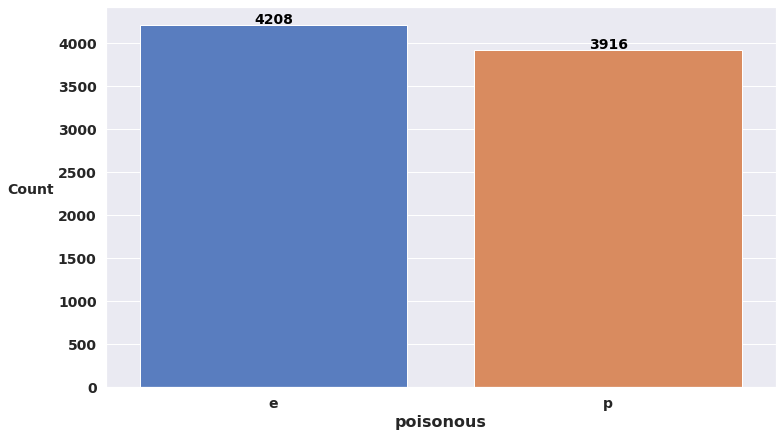

In [41]:
dist_plot("poisonous")

# Data Preprocessing

### Define the target and the inputs

In [42]:
target = data['poisonous']
inputs = data.drop(['poisonous'],axis=1)

### Create a training and a testing dataset

In [43]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365, stratify = target)

In [44]:
print('Shape of the x_train:', x_train.shape,'\n')
print('Shape of the x_test:', x_test.shape,'\n')
print('Shape of the y_train:', y_train.shape,'\n')
print('Shape of the y_test:', y_test.shape)

Shape of the x_train: (6499, 21) 

Shape of the x_test: (1625, 21) 

Shape of the y_train: (6499,) 

Shape of the y_test: (1625,)


### Check the result from the stratification

In [45]:
y_train.value_counts(normalize = True)

e    0.517926
p    0.482074
Name: poisonous, dtype: float64

In [46]:
y_test.value_counts(normalize = True)

e    0.518154
p    0.481846
Name: poisonous, dtype: float64

### Define a separate encoder for the target and the inputs 

In [47]:
enc_i = OrdinalEncoder()
enc_t = LabelEncoder()

#### Apply the fit_transform() method on the training data and the transform() ethod on the test data.

In [48]:
x_train_transf = enc_i.fit_transform(x_train)
x_test_transf = enc_i.transform(x_test)

y_train_transf = enc_t.fit_transform(y_train)
y_test_transf = enc_t.transform(y_test)

In [49]:
y_train_transf

array([0, 0, 0, ..., 1, 0, 0])

### Data Rescaling

#### In order for the SVC to work correctly the inputs need to be rescaled to the range (-1, 1)

In [50]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train_transf)
x_train_rescaled = scaling.transform(x_train_transf)

# First Trial

## Training Model

In [51]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C)

In [52]:
svc.fit(x_train_rescaled, y_train_transf)

SVC(kernel='linear')

In [53]:
enc_t.classes_

array(['e', 'p'], dtype=object)

## Model Evaluation

In [71]:
# Predict the target of the observations in the test set
y_pred_test = svc.predict(x_test_transf)

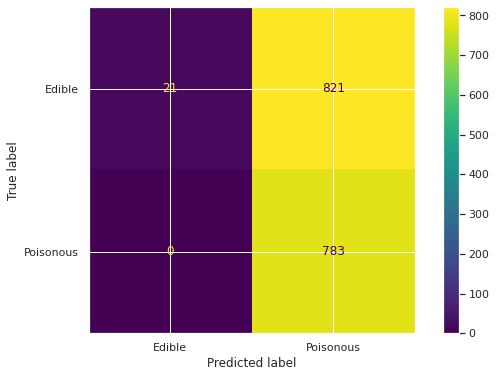

In [72]:
fig, ax = plt.subplots(figsize=(10, 6))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_transf, y_pred_test),
    display_labels=["Edible", "Poisonous"],
)

cmp.plot(ax=ax);

In [73]:
print(classification_report(y_test_transf, y_pred_test, target_names = ["Edible", "Poisonous"]))

              precision    recall  f1-score   support

      Edible       1.00      0.02      0.05       842
   Poisonous       0.49      1.00      0.66       783

    accuracy                           0.49      1625
   macro avg       0.74      0.51      0.35      1625
weighted avg       0.75      0.49      0.34      1625



# Second Trial (Hyperparameter Tuning with GridSearchCV)

### Choose the best kernel and optimal C parameter based on Cross Validation of the training data

In [74]:
tuned_parameters = [
    {"kernel": ["linear"], "C": [1, 10]},
    {"kernel": ["poly"], "C":[1, 10]},
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10]}
]

In [75]:
scores = ["precision", "recall"]

In [76]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(x_train_rescaled, y_train_transf)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test_transf, clf.predict(scaling.transform(x_test_transf))
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'kernel': 'poly'}

Grid scores on development set:

0.952 (+/-0.013) for {'C': 1, 'kernel': 'linear'}
0.954 (+/-0.009) for {'C': 10, 'kernel': 'linear'}
1.000 (+/-0.000) for {'C': 1, 'kernel': 'poly'}
1.000 (+/-0.000) for {'C': 10, 'kernel': 'poly'}
0.927 (+/-0.004) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.894 (+/-0.014) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.948 (+/-0.008) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.927 (+/-0.004) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.0